需要的软件包:  
keras    
matplotlib  
snsborn  

为了保存keras模型的结构图，还需要   
graphviz  
pyplot  


# 搭建网络

In [1]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.regularizers import l1

def cnn_model(img_shape=(32, 32, 3),n_classes=10,l2_reg=0.0,bn=False):

    # Initialize model
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(16, (3, 3), strides=(1,1),input_shape=img_shape, padding='same', kernel_regularizer=l1(l2_reg),name='conv1'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2,2),name='pooling1'))

    # Layer 2
    alexnet.add(Conv2D(32, (3,3),strides=(1,1), padding='same',kernel_regularizer=l2(l2_reg),name='conv2'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2,2),name='pooling2'))
    
    
    # Layer 3
    alexnet.add(Conv2D(64, (3,3),strides=(1,1), padding='same',kernel_regularizer=l2(l2_reg),name='conv3'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2,2),name='pooling3'))
    
    
    # Layer 4
    alexnet.add(Conv2D(64, (3,3),strides=(1,1), padding='same',kernel_regularizer=l2(l2_reg),name='conv4'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
#     alexnet.add(MaxPooling2D(pool_size=(2,2),name='pooling4'))


    # Layer 5
    alexnet.add(Conv2D(64, (3, 3),strides=(1,1), padding='same',kernel_regularizer=l2(l2_reg),name='conv5'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
#     alexnet.add(MaxPooling2D(pool_size=(2,2),name='pooling5'))

    # Layer 6
    alexnet.add(Conv2D(64, (3,3),strides=(1,1), padding='same',kernel_regularizer=l2(l2_reg),name='conv6'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    
    
   # Layer 7
    alexnet.add(Conv2D(64, (3,3),strides=(1,1), padding='same',kernel_regularizer=l2(l2_reg),name='conv7'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    
   
    # Layer 8
    alexnet.add(Conv2D(64, (3,3),strides=(1,1), padding='same',kernel_regularizer=l2(l2_reg),name='conv8'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    
    
    # Layer 9
    alexnet.add(Conv2D(64, (3,3),strides=(1,1), padding='same',kernel_regularizer=l2(l2_reg),name='conv9'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    
    
   # Layer 10
    alexnet.add(Conv2D(64, (3,3),strides=(1,1), padding='same',kernel_regularizer=l2(l2_reg),name='conv10'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Flatten(name='flatten'))

    # Layer 11
    alexnet.add(Dense(500,name='dense'))
    if bn:
        alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5,name='dropout'))

    # Layer 12
    alexnet.add(Dense(n_classes,activation='softmax',name='output'))

    return alexnet


Using TensorFlow backend.


模型概要

In [2]:
model_temp = cnn_model()
model_temp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
pooling1 (MaxPooling2D)      (None, 16, 16, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
pooling2 (MaxPooling2D)      (None, 8, 8, 32)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 8, 64)          18496     
__________

保存模型结构

C:\Users\zqp\AppData\Local\conda\conda\envs\kerastfgpu\lib\site-packages\ipykernel_launcher.py:6: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


(-0.5, 451.5, 3158.5, -0.5)

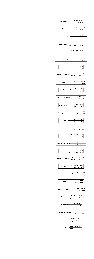

In [34]:
import matplotlib.image as mpimg 
from keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.use('Agg')
mpl.rcParams.update({'font.size': 16})

plot_model(model_temp,to_file='structure.png',show_shapes=True)
lena = mpimg.imread('structure.png') # 读取和代码处于同一目录下的 lena.png
#此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴

# 加载数据集

In [4]:
from keras.datasets import cifar10
num_classes = 10

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 训练模型

定义模型训练函数，主要控制有没有batch normalization

In [5]:
def analyze_batchnormalizaiton(epochs=2,l2_reg=0.0,bn=False):
    model = cnn_model(bn=bn,l2_reg=l2_reg)
    # initiate Adam optimizer
    opt = keras.optimizers.adam(lr=0.01)
    # Let's train the model using Adam
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    history = model.fit(x_train,y_train,validation_split=0.2,epochs=epochs,batch_size=32)  # train 
    loss,acc=model.evaluate(x_test,y_test)  # test
    print("loss=",loss,"accuracy=",acc)   
    return model,history

训练bn=False 和 bn = True的模型

In [36]:
model1,history1 = analyze_batchnormalizaiton(epochs=50,l2_reg=0.0,bn=False)

Train on 33500 samples, validate on 16500 samples
Epoch 1/50
33500/33500 [==============================] - 28s 833us/step - loss: 2.3032 - acc: 0.0984 - val_loss: 2.3027 - val_acc: 0.0981
Epoch 2/50
33500/33500 [==============================] - 20s 588us/step - loss: 2.3028 - acc: 0.0989 - val_loss: 2.3028 - val_acc: 0.0982
Epoch 3/50
33500/33500 [==============================] - 20s 591us/step - loss: 2.3028 - acc: 0.0991 - val_loss: 2.3028 - val_acc: 0.0983loss: 2.3028
Epoch 4/50
33500/33500 [==============================] - 20s 601us/step - loss: 2.3028 - acc: 0.0960 - val_loss: 2.3027 - val_acc: 0.0983
Epoch 5/50
33500/33500 [==============================] - 20s 592us/step - loss: 2.3027 - acc: 0.0972 - val_loss: 2.3028 - val_acc: 0.0983
Epoch 6/50
33500/33500 [==============================] - 20s 599us/step - loss: 2.3028 - acc: 0.0996 - val_loss: 2.3027 - val_acc: 0.0994
Epoch 7/50
33500/33500 [==============================] - 20s 593us/step - loss: 2.3027 - acc: 0.0972 - 

In [7]:
model2,history2 = analyze_batchnormalizaiton(epochs=10,l2_reg=0.0,bn=True)

Train on 33500 samples, validate on 16500 samples
Epoch 1/10
33500/33500 [==============================] - 33s 983us/step - loss: 1.6322 - acc: 0.4311 - val_loss: 1.5276 - val_acc: 0.4580
Epoch 2/10
33500/33500 [==============================] - 32s 957us/step - loss: 1.1562 - acc: 0.5951 - val_loss: 1.2250 - val_acc: 0.5844
Epoch 3/10
33500/33500 [==============================] - 31s 938us/step - loss: 0.9734 - acc: 0.6632 - val_loss: 1.1319 - val_acc: 0.6069
Epoch 4/10
33500/33500 [==============================] - 31s 931us/step - loss: 0.8638 - acc: 0.7030 - val_loss: 1.1528 - val_acc: 0.5976
Epoch 5/10
33500/33500 [==============================] - 31s 936us/step - loss: 0.7728 - acc: 0.7379 - val_loss: 0.9875 - val_acc: 0.6681
Epoch 6/10
33500/33500 [==============================] - 32s 964us/step - loss: 0.7009 - acc: 0.7633 - val_loss: 0.9435 - val_acc: 0.6819
Epoch 7/10
33500/33500 [==============================] - 33s 983us/step - loss: 0.6315 - acc: 0.7855 - val_loss: 0.

# 权重分布对比及训练速度对比

In [32]:
import numpy as np
import seaborn as sns

权重分布

C:\Users\zqp\AppData\Local\conda\conda\envs\kerastfgpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'BN')

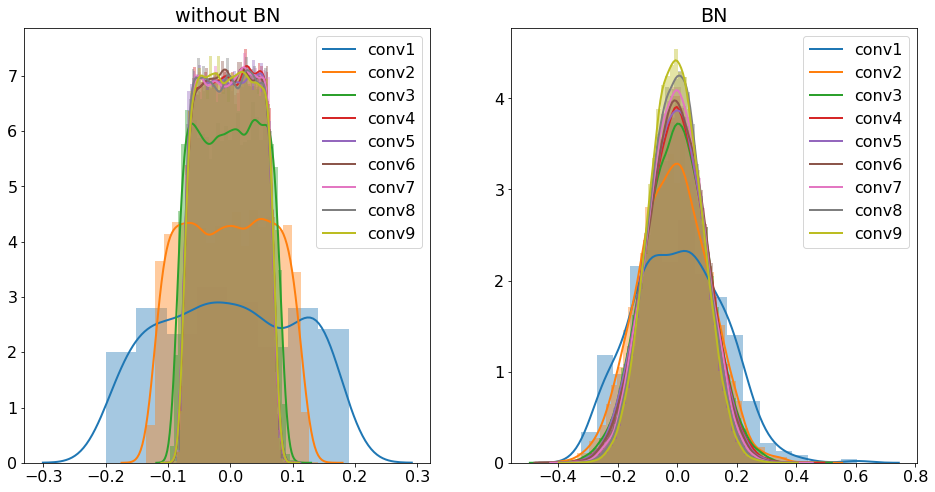

In [35]:
titles = ['without BN', 'BN']
models = ['model1','model2']
# legends = ['l2 without BN', 'l2 and BN']
layers = ['conv'+str(i) for i in range(1,10)]
fig, ax = plt.subplots(1,2,figsize=(16,8))
for model in models:
    if model=='model1': # without Bn
        for layer in layers:
            w = model1.get_layer(layer).get_weights()[0]    # 0 for weights, 1 for bias
            w = np.array(w).flatten()
            sns.distplot(w,ax=ax[0],kde_kws={"lw": 2, "label": layer})
    else:   # with Bn
        for layer in layers:
            w = model2.get_layer(layer).get_weights()[0]    # 0 for weights, 1 for bias
            w = np.array(w).flatten()
            sns.distplot(w,ax=ax[1],kde_kws={"lw": 2, "label": layer})
ax[0].set_title(titles[0])
ax[1].set_title(titles[1])

accuracy and loss

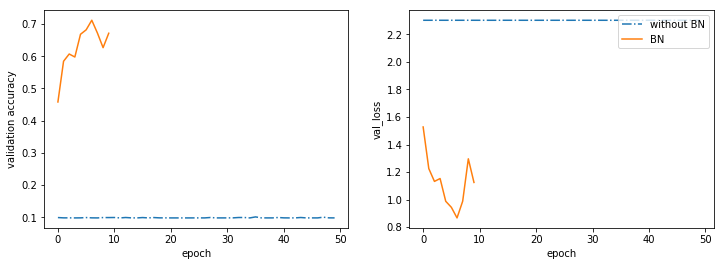

In [14]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(history1.history['val_acc'],'-.')
ax[0].plot(history2.history['val_acc'])
ax[0].set_ylabel('validation accuracy')
ax[0].set_xlabel('epoch')


ax[1].plot(history1.history['val_loss'],'-.')
ax[1].plot(history2.history['val_loss'])
ax[1].set_ylabel('val_loss')
ax[1].set_xlabel('epoch')
ax[1].legend(legends, loc='upper right')